# **Challenge - Méthodes de Régression Avancées**

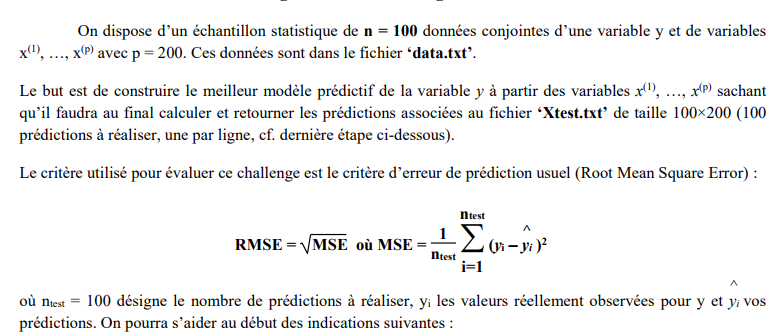

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.cross_decomposition import PLSRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR, SVR
import statsmodels.formula.api as smf
import xgboost as xgb
seed = 1222
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression



## **Mise en place d'un modèle de prédiction**

**Question 0 :**

In [ ]:
Data = pd.read_csv('data.txt', sep=' ')
print(Data)


           y      X1      X2      X3      X4      X5      X6      X7      X8  \
1    -1.3819 -0.3304  0.2842 -0.2587 -0.1855 -0.0179  0.1950 -1.6062 -0.5463   
2    -4.3784 -1.3468  0.5185 -0.3685 -0.5757 -0.8651  0.3696 -0.8717 -1.3216   
3    -4.2931  0.1663  0.5063 -0.3393 -1.2111 -0.2620  0.7885  0.1536  0.8682   
4    13.2109 -0.0805 -0.3233 -0.4649 -0.5250  0.5482  0.5116  0.5214 -0.2874   
5     5.1431  0.0711 -0.0750  0.9774  1.0988  1.1078 -1.2257  0.2114  0.3370   
..       ...     ...     ...     ...     ...     ...     ...     ...     ...   
96  -16.3370 -0.2938 -0.5120  0.3778 -0.0009  0.7018 -0.2371  0.7601 -1.6023   
97   -2.6736  1.0932 -0.2056  1.8582  1.1660 -0.4586 -2.3041  1.0634 -0.3864   
98  -10.9026 -0.5371  0.7211  0.1635  0.6122  1.0276  0.3530  0.5506 -0.0722   
99   -4.2239  0.0517  0.0623  0.4978 -0.7036 -1.8364  1.1137  0.9143 -0.2093   
100   3.9578  1.3464  0.3651  0.1980  0.6572  1.7139  1.2742  0.5709  2.0925   

         X9  ...    X191    X192    X19

**Question 1:**

In [ ]:

# Calculer l'écart-type de la variable 'y'
ecart_type_y = Data['y'].std()

# L'écart-type est le RMSE de référence lorsqu'on prédit y par sa moyenne
print("Écart-type (RMSE de référence) de la variable y:", ecart_type_y)


Écart-type (RMSE de référence) de la variable y: 8.725505544771279


**Analyse de la Référence de Base pour le RMSE**

L'analyse préliminaire a permis de déterminer l'écart-type de la variable cible y, qui s'élève à 8.7255. Cette valeur constitue notre RMSE de référence, reflétant la dispersion des valeurs de y autour de leur moyenne. Elle est utilisée comme point de comparaison pour les modèles prédictifs, agissant comme une ligne de base pour les prédictions qui ne tiendraient compte d'aucun prédicteur et se contenteraient de prévoir la moyenne de y pour chaque observation.

En pratique, cela signifie que si nous devions faire des prédictions sans aucun modèle, en attribuant simplement la moyenne de y à chaque nouvelle observation, nous nous attendrions à une erreur moyenne de 8.7255 pour ces prédictions. Tout modèle prédictif digne d'intérêt devrait donc viser un RMSE inférieur à cette ligne de base pour être considéré comme apportant une valeur ajoutée par rapport à une simple prédiction de la moyenne.

                y          X1          X2          X3          X4          X5  \
count  100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   
mean    -0.675522   -0.074262    0.000917   -0.094622    0.040626    0.056609   
std      8.725506    0.890897    0.886283    1.041871    0.825280    0.984126   
min    -17.865500   -2.194900   -1.885500   -2.523700   -1.843700   -1.868600   
25%     -6.106550   -0.725300   -0.501875   -0.848150   -0.514325   -0.611500   
50%     -1.545700   -0.089800   -0.033950   -0.140000    0.076050   -0.055650   
75%      5.338775    0.567375    0.590625    0.761925    0.657375    0.625675   
max     19.465200    2.029100    2.586600    2.349600    1.986400    2.761600   

               X6          X7          X8          X9  ...        X191  \
count  100.000000  100.000000  100.000000  100.000000  ...  100.000000   
mean     0.047456    0.000408   -0.035638    0.027314  ...    0.086685   
std      0.972249    1.022228    0.953973    0.9

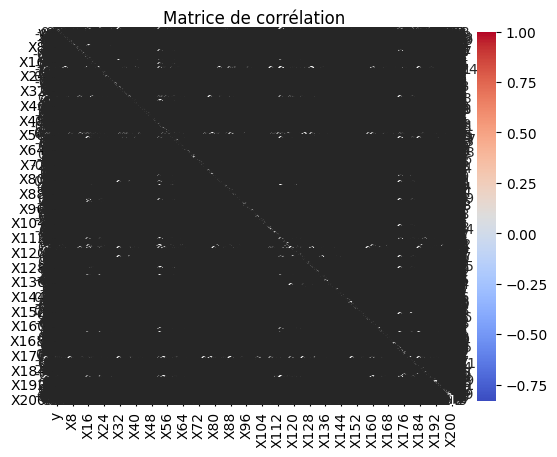

Score RMSE avec validation croisée: 5.238874524572224


In [ ]:

# Charger les données
donnees = pd.read_csv('data.txt', sep=' ')

# Analyse descriptive des données
description = donnees.describe()

# Afficher la description statistique des données
print(description)

# Vérification des corrélations
correlations = donnees.corr()

# Afficher la matrice de corrélation
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()

# Sélection de la variable cible et des prédicteurs
y = donnees['y']
X = donnees.drop('y', axis=1)

# Ajustement d'un modèle de régression linéaire
modele_lin_reg = LinearRegression()
modele_lin_reg.fit(X, y)

# Performance du modèle avec validation croisée
scores = cross_val_score(modele_lin_reg, X, y, cv=5, scoring='neg_mean_squared_error')

# Afficher la performance du modèle
print("Score RMSE avec validation croisée:", np.sqrt(-scores).mean())


**Question 2:**

In [ ]:
# Charger les données
Data = pd.read_csv('data.txt', sep=' ')  # Assurez-vous que le séparateur est correct

# Séparation des données en variables explicatives (X) et variable cible (y)
X = Data.drop('y', axis=1)
y = Data['y']

# Division des données en un ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Création et ajustement du modèle de régression linéaire
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = linear_model.predict(X_test)

# Calcul du R^2 et du RMSE pour le modèle
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Affichage du R^2 et du RMSE
print(f"R^2: {r2}")
print(f"RMSE: {rmse}")



R^2: 0.76834480047313
RMSE: 4.83455050403291


Pour faire quelque chose de simple, on peut envisager de réduire le nombre de prédicteurs
ou d'utiliser un modèle avec une régularisation comme Ridge.

Par exemple, voici comment on pourrait ajuster un modèle Ridge avec une validation croisée pour choisir le meilleur alpha :


In [ ]:
from sklearn.linear_model import RidgeCV

# Définition des valeurs alpha à tester
alpha_space = np.logspace(-6, 6, 13)

# Création et ajustement du modèle Ridge avec validation croisée
ridge_cv = RidgeCV(alphas=alpha_space, cv=5)
ridge_cv.fit(X_train, y_train)

# Prédiction avec le modèle Ridge
y_pred_ridge = ridge_cv.predict(X_test)

# Calcul du RMSE pour le modèle Ridge
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

# Affichage du meilleur alpha et du RMSE pour le modèle Ridge
print(f"Meilleur alpha pour Ridge: {ridge_cv.alpha_}")
print(f"RMSE pour le modèle Ridge: {rmse_ridge}")


Meilleur alpha pour Ridge: 100.0
RMSE pour le modèle Ridge: 4.70498721944572


**Question 3:**

In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# Charger les données
Data = pd.read_csv('data.txt', sep=' ')  # Assurez-vous que le séparateur est correct

# Séparation des données en variables explicatives (X) et variable cible (y)
X = Data.drop('y', axis=1)
y = Data['y']

# Standardisation des variables explicatives
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Division des données en un ensemble d'entraînement et de test
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Création et ajustement du modèle Lasso avec validation croisée pour sélectionner le meilleur alpha
# Utilisation d'une grille plus fine pour alpha et augmentation du nombre de plis de CV
lasso_cv = LassoCV(alphas=np.logspace(-6, 1, 100), cv=10, random_state=42)
lasso_cv.fit(X_train_scaled, y_train)

# Meilleur alpha trouvé
print(f"Meilleur alpha pour Lasso: {lasso_cv.alpha_}")

# Prédiction avec le modèle Lasso
y_pred_lasso = lasso_cv.predict(X_test_scaled)

# Calcul du RMSE pour le modèle Lasso
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
print(f"RMSE pour le modèle Lasso: {rmse_lasso}")


Meilleur alpha pour Lasso: 0.2782559402207126
RMSE pour le modèle Lasso: 4.721257844044153


RMSE : Le RMSE de 4.7213 est légèrement inférieur à celui du modèle Lasso précédent (4.7258). Bien que la différence soit petite, elle indique que ce modèle fait des prédictions légèrement plus précises sur l'ensemble de test.

Optimisation d'Alpha : Le meilleur alpha trouvé (0.2783) est différent de celui du modèle Lasso précédent, ce qui suggère que la grille plus fine pour la recherche d'alpha a permis de trouver un meilleur équilibre de régularisation pour votre jeu de données.

Interprétation de l'Amélioration : Même une petite amélioration du RMSE est significative dans de nombreux contextes, surtout lorsqu'elle est obtenue sans compromettre excessivement la simplicité ou l'interprétabilité du modèle.

Validation du Modèle : L'utilisation d'un nombre plus élevé de validations croisées (CV = 10) pour la sélection d'alpha rend le processus de sélection plus robuste et fiable.


**Question  4:**

Pour tenter d'améliorer  le modèle Lasso, je propose d'explorer les stratégies suivantes :

**Ajustement plus fin de la grille d'alpha**: En explorant une gamme encore plus précise autour du meilleur alpha trouvé précédemment, vous pourriez trouver un équilibre encore meilleur pour la régularisation.

**Feature Engineering**: Créer de nouvelles variables (par exemple, des interactions entre variables, des transformations polynomiales, etc.) peut révéler des relations plus complexes dans les données.

**Élimination des variables peu informatives** : Supprimer manuellement les variables qui semblent peu informatives, basé sur leur contribution dans les modèles précédents ou leur corrélation avec la variable cible.

**Optimisation Hyperparamétrique**: Explorer d'autres hyperparamètres du modèle Lasso, comme le nombre maximum d'itérations ou la tolérance pour l'arrêt des itérations.

**Combinaison de modèles**: Parfois, combiner les prédictions de plusieurs modèles (par exemple, en utilisant une approche d'ensemble) peut améliorer la performance globale.

La méthode Elastic Net est une technique de régularisation avancée en régression qui combine
les caractéristiques des régressions LASSO et Ridge, en appliquant à la fois une pénalité L1 pour
sélectionner des variables et une pénalité L2 pour gérer la multicollinéarité entre les prédicteurs,
ce qui la rend particulièrement efficace dans les situations avec de nombreux prédicteurs
corrélés et pour prévenir le surajustement

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.metrics import mean_squared_error
import numpy as np

# Charger les données
Data = pd.read_csv('data.txt', sep=' ')  # Assurez-vous que le séparateur est correct

# Séparation des données en variables explicatives (X) et variable cible (y)
X = Data.drop('y', axis=1)
y = Data['y']

# Standardisation des variables explicatives
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Division des données en un ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Création et ajustement du modèle Elastic Net avec validation croisée
# Vous pouvez ajuster les paramètres l1_ratio et alphas selon vos besoins
elastic_net_cv = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], alphas=np.logspace(-6, 2, 100), cv=5, random_state=42)
elastic_net_cv.fit(X_train, y_train)

# Meilleur l1_ratio et alpha
print(f"Meilleur l1_ratio: {elastic_net_cv.l1_ratio_}")
print(f"Meilleur alpha: {elastic_net_cv.alpha_}")

# Prédiction avec le modèle Elastic Net
y_pred = elastic_net_cv.predict(X_test)

# Calcul du RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")


Meilleur l1_ratio: 0.1
Meilleur alpha: 0.6579332246575682
RMSE: 4.392991629340452


**Question 5:**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import ElasticNetCV


# Charger les données d'entraînement (ajustez le chemin et le séparateur si nécessaire)
Data = pd.read_csv('data.txt', sep=' ')

# Charger les données de test
X_test = pd.read_csv('Xtest.txt', sep=' ')

# Définir et ajuster PolynomialFeatures
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(Data.drop('y', axis=1))

# Définir et ajuster StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)

# Ajuster le modèle ElasticNetCV sur les données d'entraînement transformées
y_train = Data['y']
elastic_net_cv = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], alphas=np.logspace(-6, 2, 100), cv=10, random_state=42, max_iter=10000)
elastic_net_cv.fit(X_train_scaled, y_train)

# Meilleur l1_ratio et alpha
print(f"Meilleur l1_ratio pour Elastic Net: {elastic_net_cv.l1_ratio_}")
print(f"Meilleur alpha pour Elastic Net: {elastic_net_cv.alpha_}")

# Appliquer les mêmes transformations sur les données de test
X_test_poly = poly.transform(X_test)
X_test_scaled = scaler.transform(X_test_poly)

# Prédire avec le modèle Elastic Net
predictions = elastic_net_cv.predict(X_test_scaled)

# Enregistrer les prédictions dans un fichier texte
np.savetxt("BATTISTINI.txt", predictions, fmt='%f')


Meilleur l1_ratio pour Elastic Net: 1.0
Meilleur alpha pour Elastic Net: 0.37649358067924715
